# Short Assigment 2: Image Restoration

In [9]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

def gaussian_filter(k, sigma):
   arx = np.arange((-k // 2) + 1.0, (k // 2) + 1.0) # return spaced values in (-k/2+1,k/2+1) 
   x, y = np.meshgrid(arx, arx) # return coordinated matrices for coordinated vectors
   filt = np.exp( -(1/2)*(np.square(x) + np.square(y))/np.square(sigma) ) # apply Gaussian eq
   return filt/np.sum(filt) # return normalized filter

def rmse(f,g):
    size = f.shape
    return np.sqrt(np.sum(np.square(f-g))/(size[0]*size[1]))
    #return np.sqrt(np.sum(np.square(f-g))/(size[0]*size[1]))

 Standar Deviation: 53.7


(-0.5, 127.5, 127.5, -0.5)

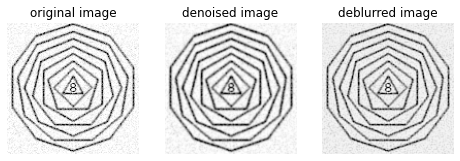

In [15]:
# image input
f = imageio.imread("case_b1_n.png")
k = 3
sigma = 0.6
gamma = 0.001

# create the filter according to the inputs
h = gaussian_filter(k,sigma)

#######################  DENOISING  ########################

# padding the filter so that it has the same size of the image
pad1 = (f.shape[0]//2)-h.shape[0]//2
hp = np.pad(h, (pad1,pad1-1), "constant",  constant_values=0)

# to apply Fast Fourier Transform
F = np.fft.fft2(f)
H = np.fft.fft2(hp)

# to remove the noise
G = np.multiply(F,H)
f_est = np.fft.ifft2(G)
f_est = np.fft.fftshift(f_est)
f_est = np.abs(np.real(f_est))

# to transforme the image without noise for further consideration in the deblurring process
Gest = np.fft.fft2(f_est)

#######################  NORMALIZING (IMG without NOISE)  ########################
# it is required to have the values in the interval: [0,max(input_img)]
maxf = np.amax(f) # max. value of the input img

minf = np.amin(f) # max. value of the input img



maxf_est = np.amax(f_est) # max. value of the image without noise

minf_est = np.amin(f_est) # min. value of the image without noise

# to scale the image
f_norm = (f_est-minf_est)*maxf/(maxf_est-minf_est)

maxf_est_norm = np.amax(f_norm) # max. value of the image without noise

minf_est_norm = np.amin(f_norm) # min. value of the image without noise



##########################  DEBLURING  ###########################
p_x = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]]) # Laplacian operator
# padding the filter so that it has the same size of the image
pad_px = (f.shape[0]//2)-p_x.shape[0]//2
p_x_pad = np.pad(p_x, (pad_px,pad_px-1), "constant",  constant_values=0)

P = np.fft.fft2(p_x_pad) 

# to get the values for the  Constrained Least Squares Filter
Hc = np.conjugate(H) 
aH = (np.abs(H))**2
aP = (np.abs(P))**2

######### Constrained Least Square Filtering #########
F_hat = np.divide( np.multiply(Gest,Hc),(aH + (gamma*aP)) ) # ojo con G*
# to get the RESTORED image
f_hat_est = np.fft.ifft2(F_hat)
f_hat_est = np.fft.fftshift(f_hat_est)
f_hat_est = np.abs(np.real(f_hat_est))

#######################  NORMALIZING (RESTORED IMG) ########################

maxd = np.amax(f_est) # max. value of the image without noise


maxf_hat_est = np.amax(f_hat_est) # max. value of the image without blur

minf_hat_est = np.amin(f_hat_est) # min. value of the image without blur
# to scale the image
f_hat_norm = (f_hat_est-minf_hat_est)*maxd/(maxf_hat_est-minf_hat_est)

# present the OUTPUT as it is required
# Standard Deviation value of the image pixels after restoration

print(" Standar Deviation: %.1f" % np.std(f_hat_norm))

plt.figure(figsize=(8,8))
plt.subplot(131)
plt.imshow(f, cmap="gray"); plt.title("original image")
plt.axis('off')
plt.subplot(132)
plt.imshow(f_est, cmap="gray"); plt.title("denoised image")
plt.axis('off')

plt.subplot(133)
plt.imshow(f_hat_est, cmap="gray"); plt.title("deblurred image")
plt.axis('off')